In [1]:
#Step1- import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Step2- load dataset
transactions_df=pd.read_csv("transactions.csv")
markets_df=pd.read_csv("markets.csv")
products_df=pd.read_csv("products.csv")
date_df=pd.read_csv("date.csv")
customers_df=pd.read_csv("customers.csv")

In [3]:
#Step3- for data understanding- display some rows(head,tail,sample)
transactions_df.sample(5)

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin,profit,cost_price
73617,Prod283,Cus016,Mark002,2017-11-03,1,139,INR,0.38,52.82,86.18
2669,Prod281,Cus020,Mark011,2018-07-25,1,97,INR,-0.25,-24.25,121.25
25492,Prod280,Cus017,Mark011,2019-03-14,1,51,INR,-0.07,-3.57,54.57
84807,Prod327,Cus003,Mark003,2018-06-04,2,5282,INR,-0.01,-52.82,5334.82
10817,Prod100,Cus019,Mark011,2018-04-09,1,407,INR,-0.15,-61.05,468.05


In [4]:
markets_df.sample(5)

,markets_code,markets_name,zone
2,Mark003,Ahmedabad,North
11,Mark012,Surat,North
3,Mark004,Delhi NCR,North
12,Mark013,Bhopal,Central
16,Mark999,Paris,NaN


In [5]:
products_df.sample(5)

,product_code,product_type
135,Prod136,Own Brand\r
236,Prod237,Distribution\r
276,Prod277,Own Brand\r
93,Prod094,Own Brand\r
85,Prod086,Own Brand\r


In [6]:
date_df.sample(5)

,date,cy_date,year,month_name,date_yy_mmm
745,2019-06-16,2019-06-01,2019,June,19-Jun\r
893,2019-11-11,2019-11-01,2019,November,19-Nov\r
615,2019-02-06,2019-02-01,2019,February,19-Feb\r
414,2018-07-20,2018-07-01,2018,July,18-Jul\r
338,2018-05-05,2018-05-01,2018,May,18-May\r


In [7]:
customers_df.sample(5)

,customer_code,custmer_name,customer_type
27,Cus028,Sage,E-Commerce
2,Cus003,Excel Stores,Brick & Mortar
6,Cus007,Info Stores,Brick & Mortar
29,Cus030,Synthetic,E-Commerce
9,Cus010,Atlas Stores,Brick & Mortar


TRANSACTIONS DATA

In [8]:
#Step4- complete information about data(finding issues)-info,describe,null,notnull,duplicate,frequency,format of categorical data
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148395 entries, 0 to 148394
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   148395 non-null  object 
 1   customer_code  148395 non-null  object 
 2   market_code    148395 non-null  object 
 3   order_date     148395 non-null  object 
 4   sales_qty      148395 non-null  int64  
 5   sales_amount   148395 non-null  int64  
 6   currency       148395 non-null  object 
 7   profit_margin  148395 non-null  float64
 8   profit         148395 non-null  float64
 9   cost_price     148395 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 11.3+ MB


In [9]:
transactions_df.describe()

,sales_qty,sales_amount,profit_margin,profit,cost_price
count,148395.000000,1.483950e+05,148395.000000,148395.000000,1.483950e+05
mean,16.370376,6.636433e+03,0.024448,166.158350,6.470649e+03
std,115.394269,3.008649e+04,0.218956,6850.373158,2.977992e+04
min,1.000000,5.000000e+00,-0.350000,-369348.500000,3.050000e+00
25%,1.000000,1.760000e+02,-0.160000,-67.320000,1.665000e+02
50%,1.000000,5.190000e+02,0.020000,5.550000,5.082600e+02
75%,7.000000,3.065000e+03,0.210000,105.600000,2.907130e+03
max,14049.000000,1.510944e+06,0.400000,481775.040000,1.846742e+06


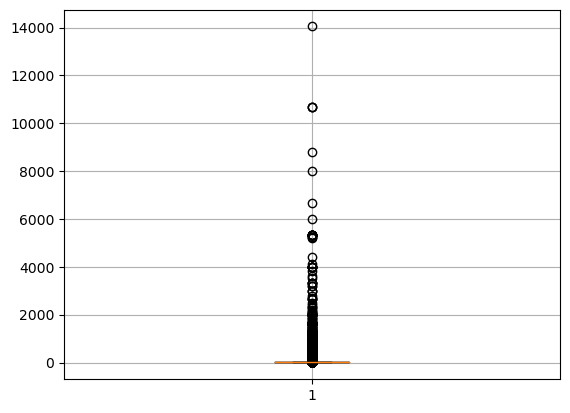

In [10]:
#OUTLIERS HANDLING
df1=transactions_df["sales_qty"]
plt.boxplot(df1)
plt.grid()
plt.show()

In [11]:
q75,q25=np.percentile(df1,[75,25])

In [12]:
q75

7.0

In [13]:
q25

1.0

In [14]:
IQR=q75-q25
IQR

6.0

In [15]:
q0=q25-(IQR*1.5)
q0

-8.0

In [16]:
q100=q75+(IQR*1.5)
q100

16.0

In [17]:
fdf=df1[(df1<=q100) & (df1>=q0)]  #df created without outliers
fdf

0         1
1         1
2         1
3         1
4         1
         ..
147901    7
147902    7
147903    7
147904    7
147905    7
Name: sales_qty, Length: 126328, dtype: int64

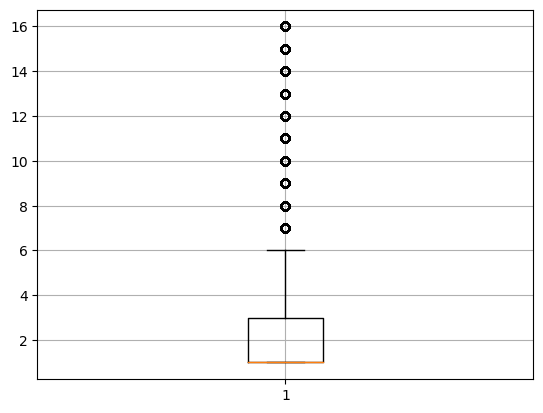

In [18]:
plt.boxplot(fdf)
plt.grid()
plt.show()

In [19]:
transactions_df.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
profit_margin    0
profit           0
cost_price       0
dtype: int64

In [20]:
transactions_df.notnull().sum()

product_code     148395
customer_code    148395
market_code      148395
order_date       148395
sales_qty        148395
sales_amount     148395
currency         148395
profit_margin    148395
profit           148395
cost_price       148395
dtype: int64

In [21]:
transactions_df.duplicated().sum() #no duplicate row

0

In [22]:
#Handling INR,USD data
transactions_df["currency"].unique()

array(['INR', 'USD'], dtype=object)

In [23]:
transactions_df["currency"].value_counts()

currency
INR    148393
USD         2
Name: count, dtype: int64

In [24]:
transactions_df[transactions_df["currency"]=="USD"]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,profit_margin,profit,cost_price
135937,Prod003,Cus005,Mark004,2017-11-20,59,500,USD,0.31,11625.0,25875.0
135938,Prod003,Cus005,Mark004,2017-11-22,36,250,USD,0.17,3187.5,15562.5


In [25]:
transactions_df.drop(transactions_df[transactions_df["currency"]=="USD"].index,inplace=True)

In [26]:
transactions_df["currency"].unique()

array(['INR'], dtype=object)

In [27]:
transactions_df["product_code customer_code market_code currency".split()]=transactions_df["product_code customer_code market_code currency".split()].astype("string")

In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148393 entries, 0 to 148394
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   product_code   148393 non-null  string 
 1   customer_code  148393 non-null  string 
 2   market_code    148393 non-null  string 
 3   order_date     148393 non-null  object 
 4   sales_qty      148393 non-null  int64  
 5   sales_amount   148393 non-null  int64  
 6   currency       148393 non-null  string 
 7   profit_margin  148393 non-null  float64
 8   profit         148393 non-null  float64
 9   cost_price     148393 non-null  float64
dtypes: float64(3), int64(2), object(1), string(4)
memory usage: 12.5+ MB


In [29]:
transactions_df["order_date"]=pd.to_datetime(transactions_df["order_date"])

MARKETS DATA

In [30]:
markets_df.sample(10)

,markets_code,markets_name,zone
13,Mark014,Hyderabad,South
16,Mark999,Paris,NaN
4,Mark005,Kanpur,North
15,Mark097,New York,NaN
2,Mark003,Ahmedabad,North
9,Mark010,Kochi,South
6,Mark007,Bhopal,Central
8,Mark009,Patna,North
1,Mark002,Mumbai,Central
7,Mark008,Lucknow,North


In [31]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   markets_code  17 non-null     object
 1   markets_name  17 non-null     object
 2   zone          15 non-null     object
dtypes: object(3)
memory usage: 540.0+ bytes


In [32]:
markets_df.isnull().sum()

markets_code    0
markets_name    0
zone            2
dtype: int64

In [33]:
markets_df["zone"]=markets_df["zone"].ffill()

In [34]:
markets_df["markets_code markets_name zone".split()]=markets_df["markets_code markets_name zone".split()].astype("string")

In [35]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   markets_code  17 non-null     string
 1   markets_name  17 non-null     string
 2   zone          17 non-null     string
dtypes: string(3)
memory usage: 540.0 bytes


In [36]:
markets_df["markets_name"].duplicated().sum()

1

In [37]:
markets_df["markets_name"].unique()

<StringArray>
[     'Chennai',       'Mumbai',    'Ahmedabad',    'Delhi NCR',
       'Kanpur',    'Bengaluru',       'Bhopal',      'Lucknow',
        'Patna',        'Kochi',       'Nagpur',        'Surat',
    'Hyderabad', 'Bhubaneshwar',     'New York',        'Paris']
Length: 16, dtype: string

In [38]:
markets_df["zone"].unique()

<StringArray>
['South', 'Central', 'North']
Length: 3, dtype: string

In [39]:
markets_df["zone"].value_counts()

zone
South      7
North      6
Central    4
Name: count, dtype: Int64

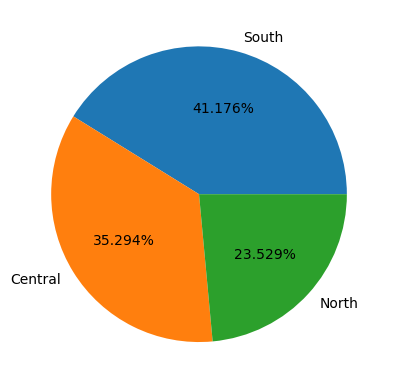

In [52]:
typem=['South', 'Central', 'North']
count=[7,6,4]
plt.pie(count,labels=typem,autopct="%.3f%%")
plt.grid()
plt.show()

PRODUCTS DATA

In [ ]:
products_df.sample(5)

In [ ]:
products_df.info()

In [ ]:
products_df["product_type"].unique()

In [ ]:
products_df["product_type"].value_counts()

In [ ]:
typep=["Own Brand","Distribution"]
count=[191,81]
plt.pie(count,labels=typep,autopct="%1.1f%%")
plt.grid()
plt.show()

DATE DATA

In [ ]:
date_df.sample(5)

In [ ]:
date_df.info()

In [ ]:
date_df["date"]=pd.to_datetime(date_df["date"])

In [ ]:
date_df["cy_date"]=pd.to_datetime(date_df["cy_date"])

CUSTOMERS DATA

In [ ]:
customers_df.sample(5)

In [ ]:
customers_df.info()

In [ ]:
customers_df["customer_code custmer_name customer_type".split()]=customers_df["customer_code custmer_name customer_type".split()].astype("string")

In [ ]:
customers_df["customer_type"].unique()

In [ ]:
customers_df["customer_type"].value_counts()

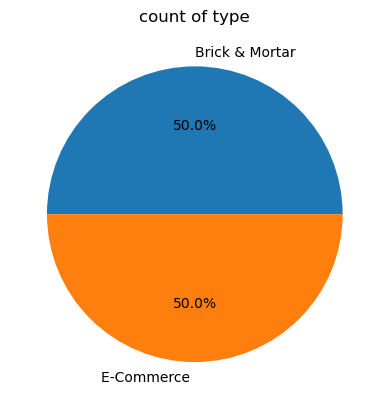

In [45]:
type1=["Brick & Mortar","E-Commerce "]
count=[19,19]
plt.pie(count,labels=type1,autopct="%1.1f%%")
plt.title("count of type")
plt.grid()
plt.show()